**A Data Scientist for a Professional Football Club Part 2**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
pd.set_option('display.max_columns', 500)
from IPython.display import display

%matplotlib inline

### Part 1

In [3]:
df = pd.read_csv('sampled_footballers.csv')
model_data = df.drop(['ID','club','club_logo','flag', 'nationality','photo','potential', 'birth_date'], axis = 'columns')

model_data.head()

,age,height_cm,weight_kg,overall,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle
0,20,175.0,70.0,58,65,30,38,56,60,53,1,3,3,Medium,High,Right,55,27,53,33,26,63,33,32,27,41,68,62,54,55,75,27,55,62,47,30,54,60,54,40,45,43,53,70
1,29,183.0,80.0,65,83,62,58,64,55,80,1,2,3,High,High,Right,63,59,64,62,55,62,46,59,43,64,81,85,73,68,65,70,75,90,77,59,78,53,60,61,68,65,52,56
2,35,183.0,78.0,67,46,66,63,66,50,71,1,3,3,High,Low,Right,51,67,69,69,61,65,63,65,64,66,34,55,78,66,51,65,72,54,80,63,67,59,70,64,67,65,45,43
3,24,178.0,72.0,69,77,69,48,70,21,39,1,3,3,Medium,Medium,Right,49,70,67,62,66,67,37,43,39,68,71,81,91,70,78,68,28,34,34,70,59,25,73,34,59,54,11,17
4,23,173.0,73.0,70,79,64,64,72,21,55,1,3,3,Medium,Medium,Right,66,66,58,68,64,70,46,48,59,71,76,82,79,68,78,65,34,69,57,59,36,19,67,66,63,63,13,18


### Part 2

In [3]:
numeric_variables = model_data.drop('overall', axis = 'columns').select_dtypes(include = [np.number]).columns

#Subtract the mean
model_data.loc[:, numeric_variables] = (model_data.loc[:, numeric_variables] - model_data.loc[:, numeric_variables].mean())

#Divide by the standard deviation
model_data.loc[:, numeric_variables] = model_data.loc[:, numeric_variables]/model_data.loc[:,numeric_variables].std()



### Part 3


`overall ~ b_0 + b_1age + b_2age**2`

Null: `b_2==0`

Alternative: `b_2 =\=0`

### Part 4

In [4]:
model2 = ols('overall ~ age + np.power(age,2)', data = model_data).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     118.0
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           1.14e-42
Time:                        08:36:46   Log-Likelihood:                -1591.3
No. Observations:                 500   AIC:                             3189.
Df Residuals:                     497   BIC:                             3201.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -5.1456      7.114     -0.723      0.470     -19.123       8.832
age                  4.9514      0.562      8.809      0.000       3.847       6.056
np.power(age, 2)    -0.0814      0.011     -7.504      0.000      -0.103      -0.060
==============================================================================
Omnibus:                       14.375   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.805
Skew:                           0.402   Prob(JB):                     0.000610
Kurtosis:                       3.253   Cond. No.                     1.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Coefficient for age**2 is negative and p<0.05. 
The null hypotheses is rejected; something definetly happens to players as they get older.

### Part 5

- Signs of the coefficient for marking change between models.
- This could be troubling because according to one model, better marking rating means better overall.  In the other, better marking means worse overall.
- Marking and interceptions are HIGHLY correlated.

In [5]:
model_data.corr()

model_mark = ols('overall ~ age + np.power(age,2) + marking', data = model_data).fit().summary()
model_mark_inter = ols('overall ~ age + np.power(age,2) + marking + interceptions', data = model_data).fit().summary()

display(model_mark)
display(model_mark_inter)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     84.46
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           3.70e-44
Time:                        08:37:50   Log-Likelihood:                -1585.3
No. Observations:                 500   AIC:                             3179.
Df Residuals:                     496   BIC:                             3195.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -5.4564      7.037     -0.775      0.438     -19.282       8.369
age                  4.8578      0.557      8.728      0.000       3.764       5.951
np.power(age, 2)    -0.0802      0.011     -7.473      0.000      -0.101      -0.059
marking              0.0418      0.012      3.473      0.001       0.018       0.065
==============================================================================
Omnibus:                       19.398   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.736
Skew:                           0.461   Prob(JB):                     3.14e-05
Kurtosis:                       3.383   Cond. No.                     1.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     68.22
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           5.70e-46
Time:                        08:37:50   Log-Likelihood:                -1578.7
No. Observations:                 500   AIC:                             3167.
Df Residuals:                     495   BIC:                             3188.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.1614      6.961     -0.598      0.550     -17.837       9.515
age                  4.7033      0.551      8.528      0.000       3.620       5.787
np.power(age, 2)    -0.0780      0.011     -7.342      0.000      -0.099      -0.057
marking             -0.0738      0.034     -2.176      0.030      -0.140      -0.007
interceptions        0.1345      0.037      3.637      0.000       0.062       0.207
==============================================================================
Omnibus:                       17.550   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.641
Skew:                           0.430   Prob(JB):                     8.96e-05
Kurtosis:                       3.392   Cond. No.                     1.90e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Part 6

Our p value is:  0.005


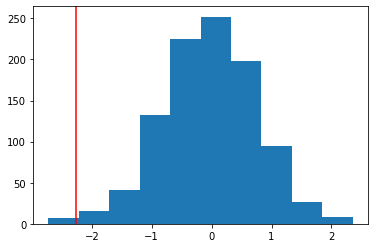

In [6]:
# The effect we see from the data
observed_effect = ols('overall ~ preferred_foot',data = model_data).fit().params[1]

# Initialize somewhere to put the resampled effects
randomization_tests_resamps = np.zeros(1000)

# Make a copy of the data to shuffle.
preferred_foot = model_data.preferred_foot.copy().values

# Copy the original data too
copy_df = model_data.copy()

for i in range(1000):
    
    np.random.shuffle(preferred_foot)
    copy_df['preferred_foot'] = preferred_foot
    shuffled_effect = ols('overall ~ preferred_foot',data = copy_df).fit().params[1]
    randomization_tests_resamps[i]=shuffled_effect

# Plots
plt.hist(randomization_tests_resamps)
plt.axvline(observed_effect, color = 'red')

p_value = np.mean(np.abs(randomization_tests_resamps)>np.abs(observed_effect))
print('Our p value is: ', p_value)

### Part 7




 p-value = 0.243. The null that footedness has no effect on overall is failed to reject.

In [8]:
df = pd.read_csv('footballer_data.csv')

full_data = df.drop(['ID','club','club_logo','flag', 'nationality','photo','potential', 'birth_date'], axis = 'columns')

model = ols('overall ~ preferred_foot + age + np.power(age,2) + interceptions', data = full_data).fit().summary()
display(model)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     2157.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        08:40:48   Log-Likelihood:                -56885.
No. Observations:               17994   AIC:                         1.138e+05
Df Residuals:                   17989   BIC:                         1.138e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   3.6941      1.149      3.216      0.001       1.442       5.946
preferred_foot[T.Right]    -0.1176      0.101     -1.168      0.243      -0.315       0.080
age                         4.0963      0.090     45.382      0.000       3.919       4.273
np.power(age, 2)           -0.0666      0.002    -38.724      0.000      -0.070      -0.063
interceptions               0.0692      0.002     32.490      0.000       0.065       0.073
==============================================================================
Omnibus:                      466.844   Durbin-Watson:                   0.590
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.822
Skew:                           0.364   Prob(JB):                    3.28e-116
Kurtosis:                       3.425   Cond. No.                     1.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Part H

The club owner, Owen Owner, saw the results of your randomization test and is convinced that he should replace the whole team with left-footed players. Using your results from Part G, write an email explaining to him why this isn't a worthwhile endeavour. 



Regarding the club's preference for left-footed players as a result of the randomization test you saw: though the regression of overall rating on only footedness indicates that left-footed players are better than right-footed players, when we include other variables (age and interceptions) in the model, the effect of footedness is no longer significant. In other words, after controlling for these other variables, the footedness of the player does not seem to matter, so transitioning to an entirely left-footed team is not worthwhile.

Sincerely,

Junior Data Scientist